<a href="https://colab.research.google.com/github/castudil/Machine-Learning/blob/main/S07-Linear-Models/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpieza y análisis

In [1]:
#!pip install seaborn
#!pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

In [4]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [5]:
mpg.dropna(inplace=True)

In [6]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [7]:
mpg['origin'] = mpg['origin'].astype('category')
mpg['name'] = mpg['name'].astype('category')
mpg['name'].dtype

CategoricalDtype(categories=['amc ambassador brougham', 'amc ambassador dpl',
                  'amc ambassador sst', 'amc concord', 'amc concord d/l',
                  'amc concord dl 6', 'amc gremlin', 'amc hornet',
                  'amc hornet sportabout (sw)', 'amc matador',
                  ...
                  'volvo 145e (sw)', 'volvo 244dl', 'volvo 245', 'volvo 264gl',
                  'volvo diesel', 'vw dasher (diesel)', 'vw pickup',
                  'vw rabbit', 'vw rabbit c (diesel)', 'vw rabbit custom'],
, ordered=False, categories_dtype=object)

In [8]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   model_year    392 non-null    int64   
 7   origin        392 non-null    category
 8   name          392 non-null    category
dtypes: category(2), float64(4), int64(3)
memory usage: 36.2 KB



# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

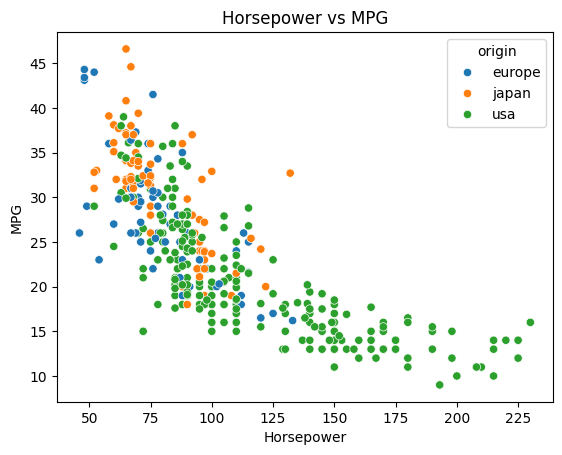

In [9]:
sns.scatterplot(data=mpg, x='horsepower', y='mpg', hue='origin')
plt.title('Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

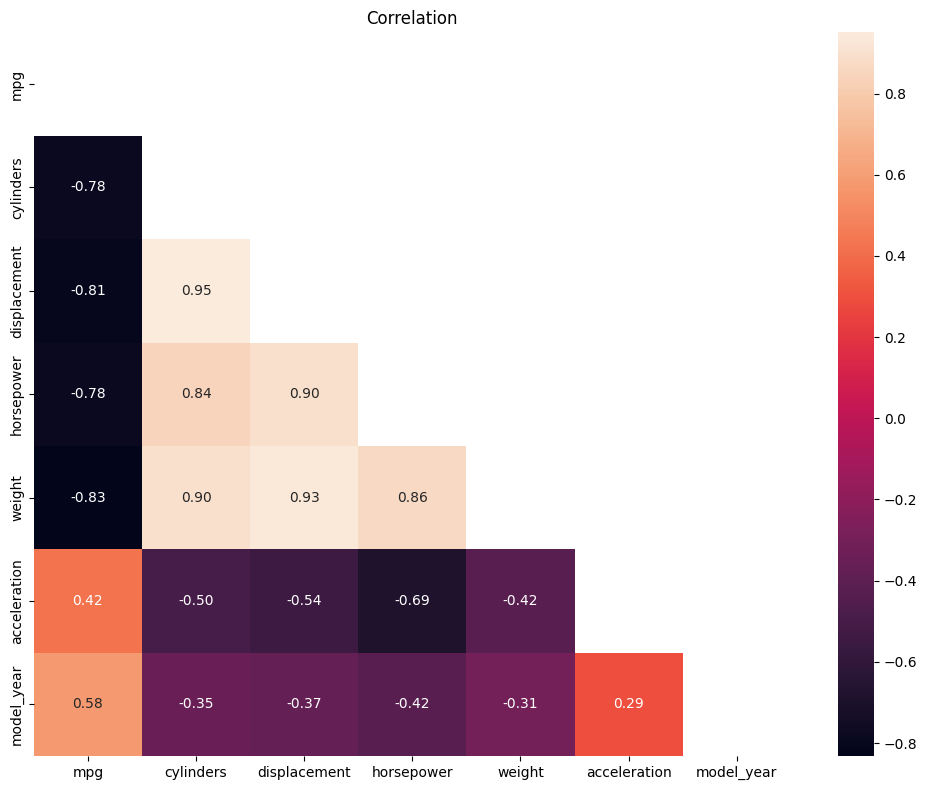

In [10]:
numeric_data = mpg.drop(['name', 'origin'], axis=1)
corr = numeric_data.corr()
mask = np.triu(corr)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, mask=mask, fmt='.2f')
plt.title("Correlation")
plt.tight_layout()
plt.show()

3) (1 punto) Entrenar un modelo de regresion lineal


## Normal

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = numeric_data.drop('mpg', axis=1)
y = numeric_data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

## Escalado

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

y_pred_scaled = ridge_model.predict(X_test_scaled)

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [13]:
def evaluate_model(y_test, y_pred):
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    import numpy as np
    
    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Imprimir resultados
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    # Retornar diccionario con métricas
    return {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    }

In [14]:
# Para el modelo sin normalizar
print("Modelo sin normalizar:")
metrics_normal = evaluate_model(y_test, y_pred)

# Para el modelo con datos normalizados
print("\nModelo con datos normalizados:")
metrics_scaled = evaluate_model(y_test, y_pred_scaled)

Modelo sin normalizar:
Mean Squared Error (MSE): 10.5032
Root Mean Squared Error (RMSE): 3.2409
Mean Absolute Error (MAE): 2.5039
R² Score: 0.7942

Modelo con datos normalizados:
Mean Squared Error (MSE): 10.5366
Root Mean Squared Error (RMSE): 3.2460
Mean Absolute Error (MAE): 2.5046
R² Score: 0.7936


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


In [15]:
def plot_feature_correlation(data, feature, target, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 5))
    
    # Obtener coeficiente de correlación
    corr_coef = data[[feature, target]].corr().iloc[0,1]
    
    sns.regplot(
        data=data, 
        x=feature, 
        y=target,
        scatter_kws={'alpha':0.5, 's':30, 'color':'darkblue'},
        line_kws={'color':'red', 'linewidth':1.5},
        ci=95,
        ax=ax
    )
    
    ax.set_title(f'{feature.capitalize()} vs {target.upper()} (r: {corr_coef:.2f})')
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel(target.upper())
    ax.grid(alpha=0.2)
    
    return ax

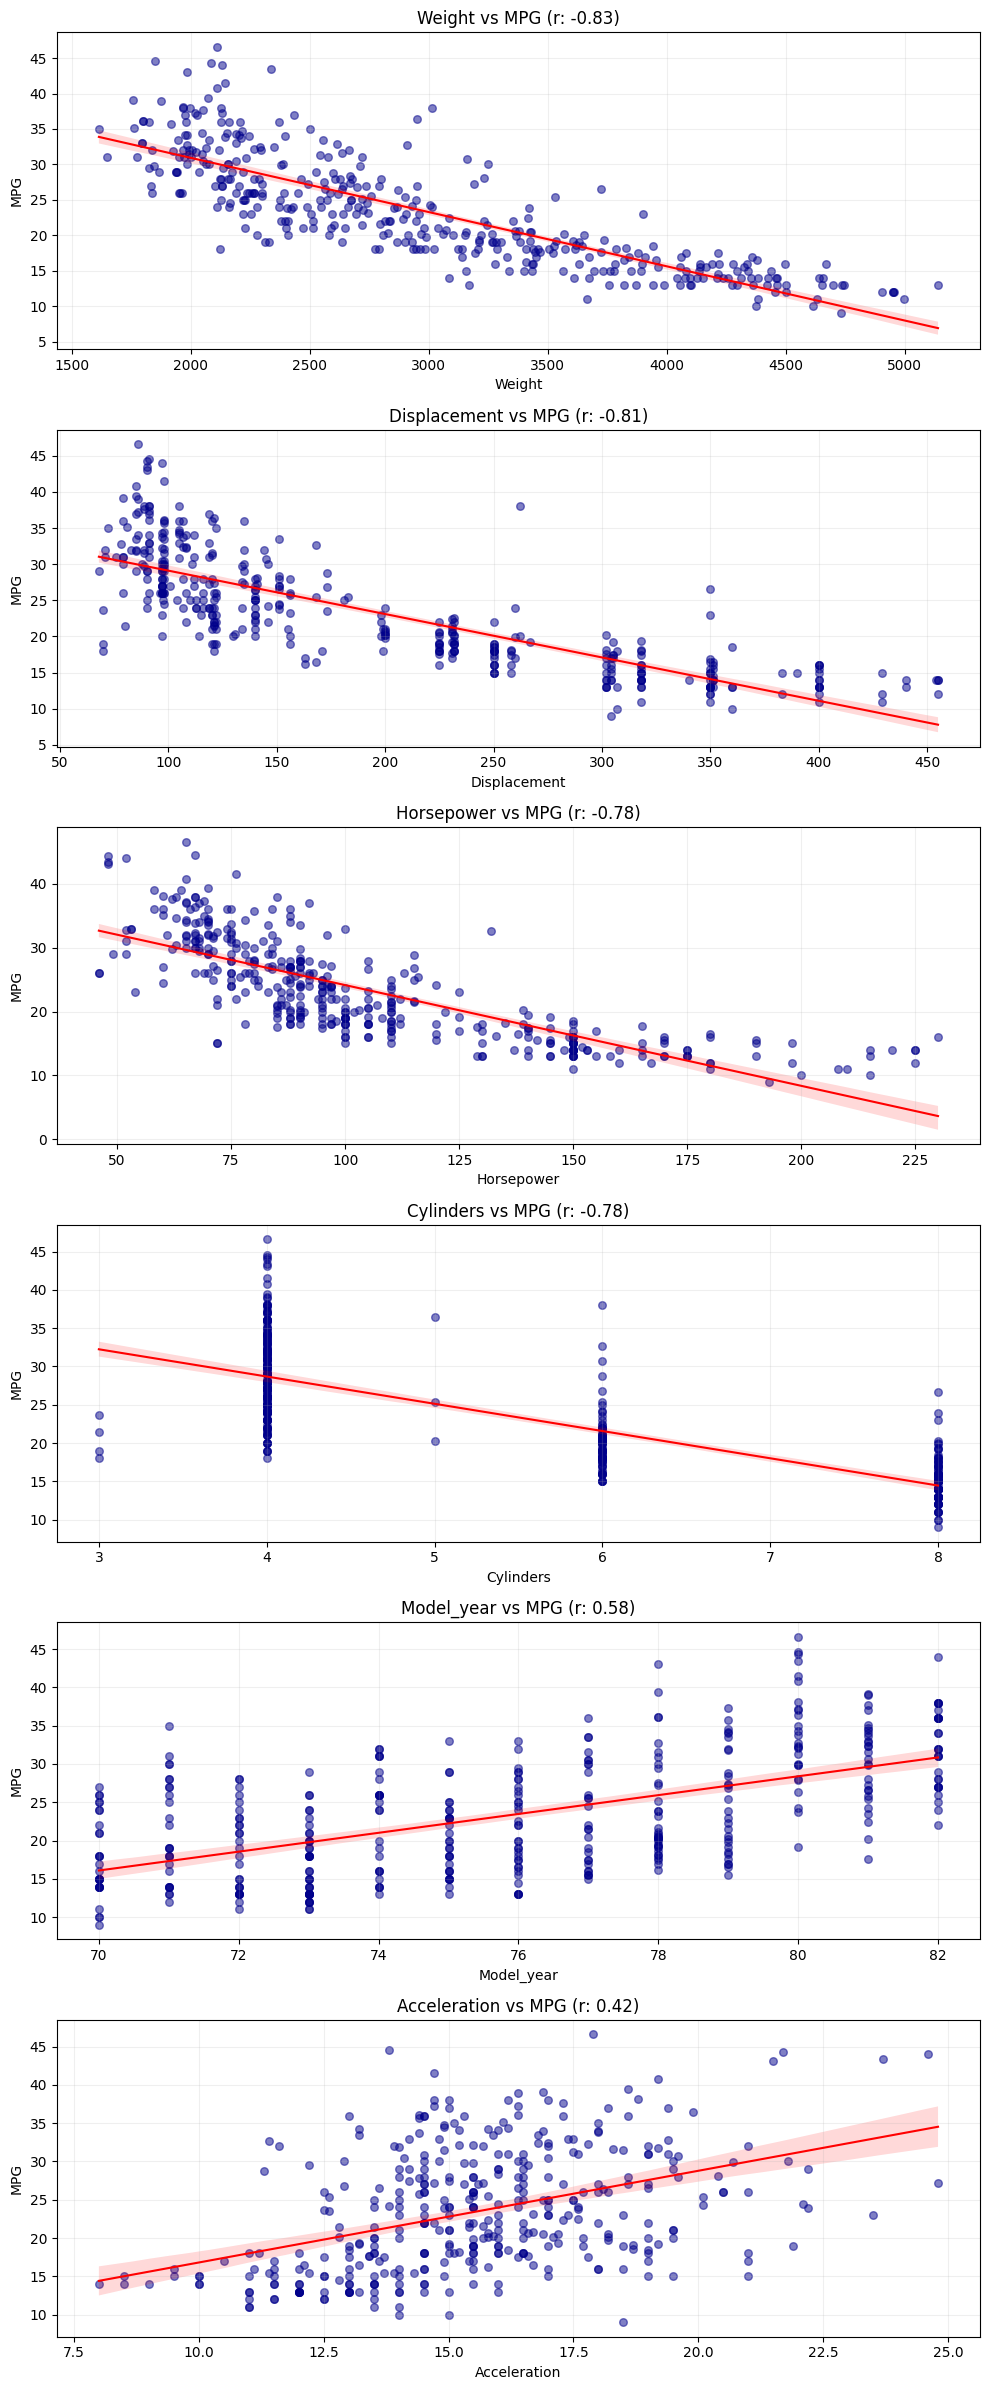

Variables ordered by absolute correlation with mpg:
mpg             1.000000
weight          0.832244
displacement    0.805127
horsepower      0.778427
cylinders       0.777618
model_year      0.580541
acceleration    0.423329
Name: mpg, dtype: float64


In [16]:
target = 'mpg'
abs_corr = numeric_data.corr()[target].abs().sort_values(ascending=False)

top_features = abs_corr.index[1:7]  # Tomar las 6 características más correlacionadas

# Configurar el gráfico en una disposición vertical (una columna)
fig, axes = plt.subplots(6, 1, figsize=(10, 24))  # 6 filas, 1 columna

# Graficar cada característica
for i, feature in enumerate(top_features):
    plot_feature_correlation(mpg, feature, target, ax=axes[i])

plt.tight_layout()
plt.show()

# Mostrar tabla de correlaciones ordenadas para referencia
print(f"Variables ordered by absolute correlation with {target}:")
print(abs_corr.head(7))  # Mostrar la variable objetivo y las 6 más correlacionadas

6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.